In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import math

In [3]:
dataset=pd.read_csv('Rbt_Car_Torq.csv')
dataset['Time_Stamp'] = pd.to_datetime(dataset['Time_Stamp'], format="%Y-%m-%d %H:%M:%S")

In [36]:
selected_col=[u'Rbt_Name', u'Time_Stamp', u'Program',
       u'G1J1RMS', u'G1J2RMS', u'G1J3RMS', u'G1J4RMS',
       u'G1J5RMS', u'G1J6RMS']
rbt_arms=[u'G1J1RMS', u'G1J2RMS', u'G1J3RMS', u'G1J4RMS',u'G1J5RMS', u'G1J6RMS']

In [37]:
def avg(df,r_window):
    for s in rbt_arms:
        col1=s+'_av'
        
        df[col1]=df.groupby(['Rbt_Name','Program'])[s].rolling(window=r_window,min_periods=7).mean().values
       
    return df

In [38]:
def df_gen(df,rbt_name):
    df_hourly=df[df.Rbt_Name.isin([rbt_name])][selected_col]
    df_daily=df_hourly.assign(date=(lambda x: x['Time_Stamp'].apply(datetime.date)))
    df_daily['Time_Stamp'] = pd.to_datetime(df_daily['date'], format="%Y-%m-%d")
    df_daily.drop('date',axis=1,inplace= True)
    df_daily=df_daily.groupby(['Rbt_Name','Program','Time_Stamp']).mean()
    df_daily.reset_index(inplace=True)
    df_Mav=df_daily.copy()
    df_Mav=avg(df_Mav,7)
    return df_hourly,df_daily,df_Mav

In [39]:
def lineplot(df,Rbt_arm_feature):
    df_plot=df[['Rbt_Name','Program','Time_Stamp']+[Rbt_arm_feature]]
    df_plot.set_index('Time_Stamp', inplace=True)
    df_plot.groupby(['Rbt_Name','Program'])[Rbt_arm_feature].plot(figsize=(25,10),legend=True)


In [40]:
def lineplotAV(df,Rbt_arm_feature):
    df_plot=df[['Rbt_Name','Program','Time_Stamp']+[Rbt_arm_feature,Rbt_arm_feature+'_av']]
    df_plot.set_index('Time_Stamp', inplace=True)
    df_plot.groupby(['Rbt_Name','Program'])[Rbt_arm_feature].plot(figsize=(50,30),legend=True)
    df_plot.groupby(['Rbt_Name','Program'])[Rbt_arm_feature+'_av'].plot(figsize=(50,30),legend=True)

In [53]:
def notification(df,rbt_name,rbt_arm,programe):
    df_alert=df[((df['Rbt_Name']==rbt_name) & (df['Program']==programe))][['Time_Stamp',rbt_arm+'_av']]
    for i in range(0,len(df_alert)):
        try:
            c=float(df_alert[rbt_arm+'_av'].iloc[i])
            p=float(df_alert[rbt_arm+'_av'].iloc[i-5])
            if not((math.isnan(c)) or (math.isnan(p))):
                per=abs((c-p)/c)
                if per>0.03:
                    print(df_alert.Time_Stamp.iloc[i])
        except:
            pass  

In [54]:
def alert(df,rbt_name):
    df_hourly,df_daily,df_Mav=df_gen(df,rbt_name)
    for i in rbt_arms:
        for j in df_Mav.Program.value_counts().index.values:
            print ('Robot Name: ',rbt_name)
            print ('Robot Arm Axis: ',i)
            print ('Programe Line: ',j)
            print ('Alert Notification Date: ')
            notification(df_Mav,rbt_name,i,j)
            print('###########################################')
    return df_hourly,df_daily,df_Mav

In [55]:
rbt_name='T2_FMR1_R5205'
df_hourly,df_daily,df_Mav=alert(dataset,rbt_name)

('Robot Name: ', 'T2_FMR1_R5205')
('Robot Arm Axis: ', u'G1J1RMS')
('Programe Line: ', 'A3_4COM')
Alert Notification Date: 
###########################################
('Robot Name: ', 'T2_FMR1_R5205')
('Robot Arm Axis: ', u'G1J1RMS')
('Programe Line: ', 'B2_4COM')
Alert Notification Date: 
###########################################
('Robot Name: ', 'T2_FMR1_R5205')
('Robot Arm Axis: ', u'G1J1RMS')
('Programe Line: ', 'B1_4COM')
Alert Notification Date: 
###########################################
('Robot Name: ', 'T2_FMR1_R5205')
('Robot Arm Axis: ', u'G1J1RMS')
('Programe Line: ', 'A4_4COM')
Alert Notification Date: 
###########################################
('Robot Name: ', 'T2_FMR1_R5205')
('Robot Arm Axis: ', u'G1J2RMS')
('Programe Line: ', 'A3_4COM')
Alert Notification Date: 
###########################################
('Robot Name: ', 'T2_FMR1_R5205')
('Robot Arm Axis: ', u'G1J2RMS')
('Programe Line: ', 'B2_4COM')
Alert Notification Date: 
2018-01-12 00:00:00
2018-01-13 00:00

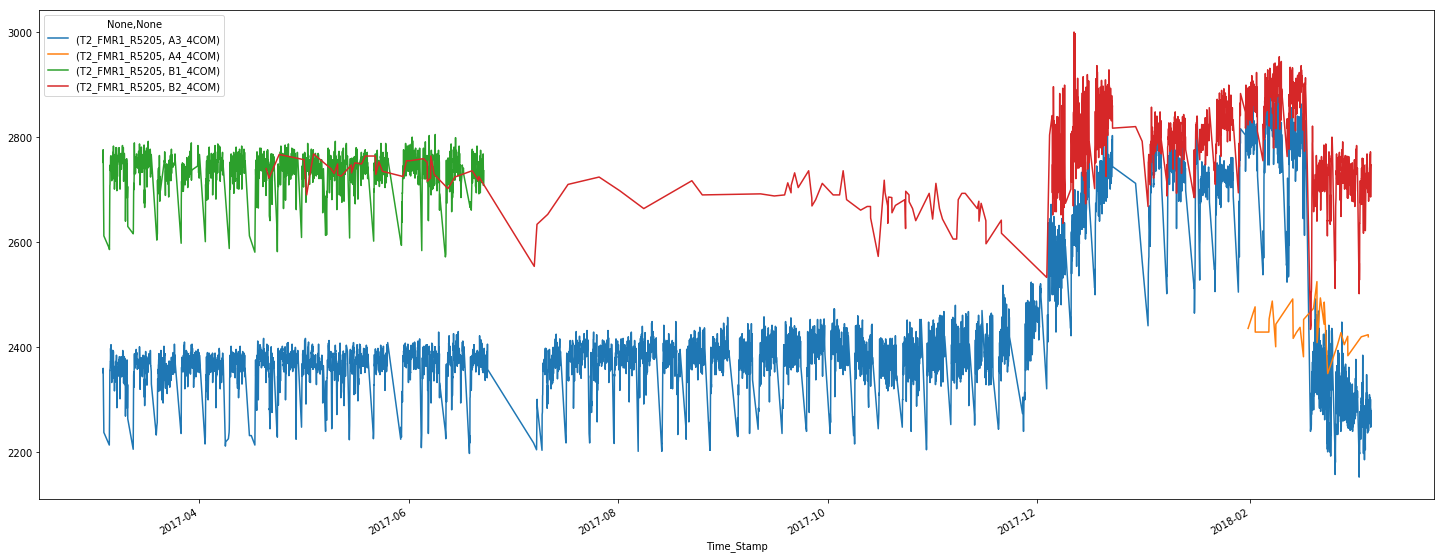

In [50]:
lineplot(df_hourly,'G1J3RMS')

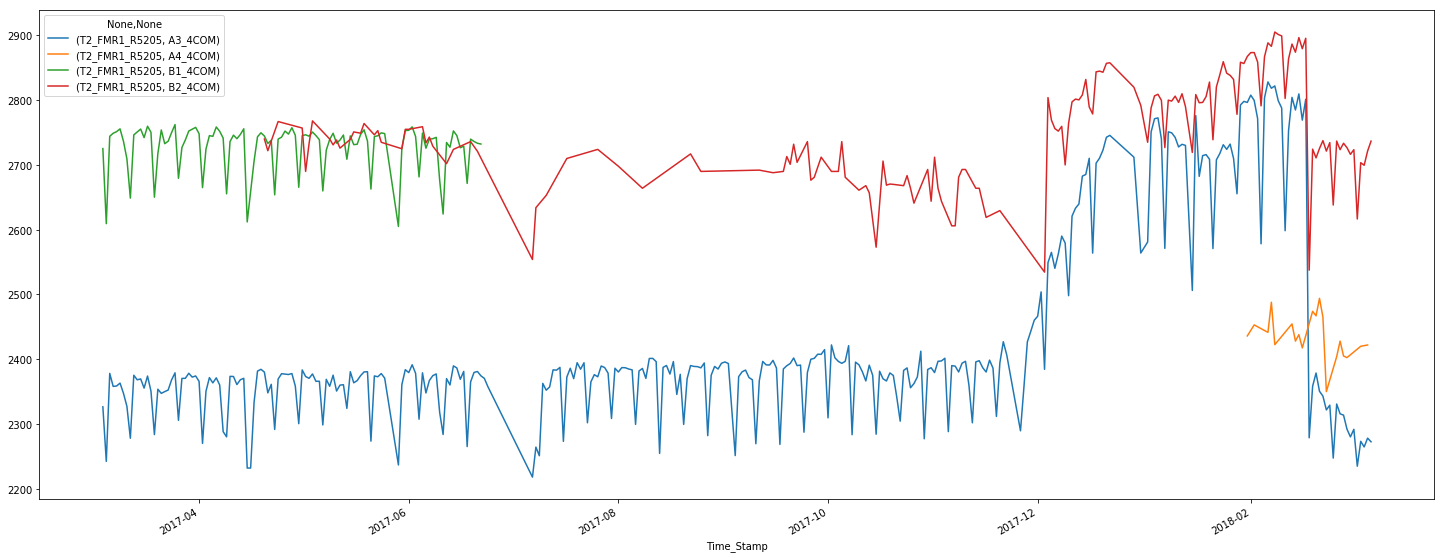

In [51]:
lineplot(df_daily,'G1J3RMS')

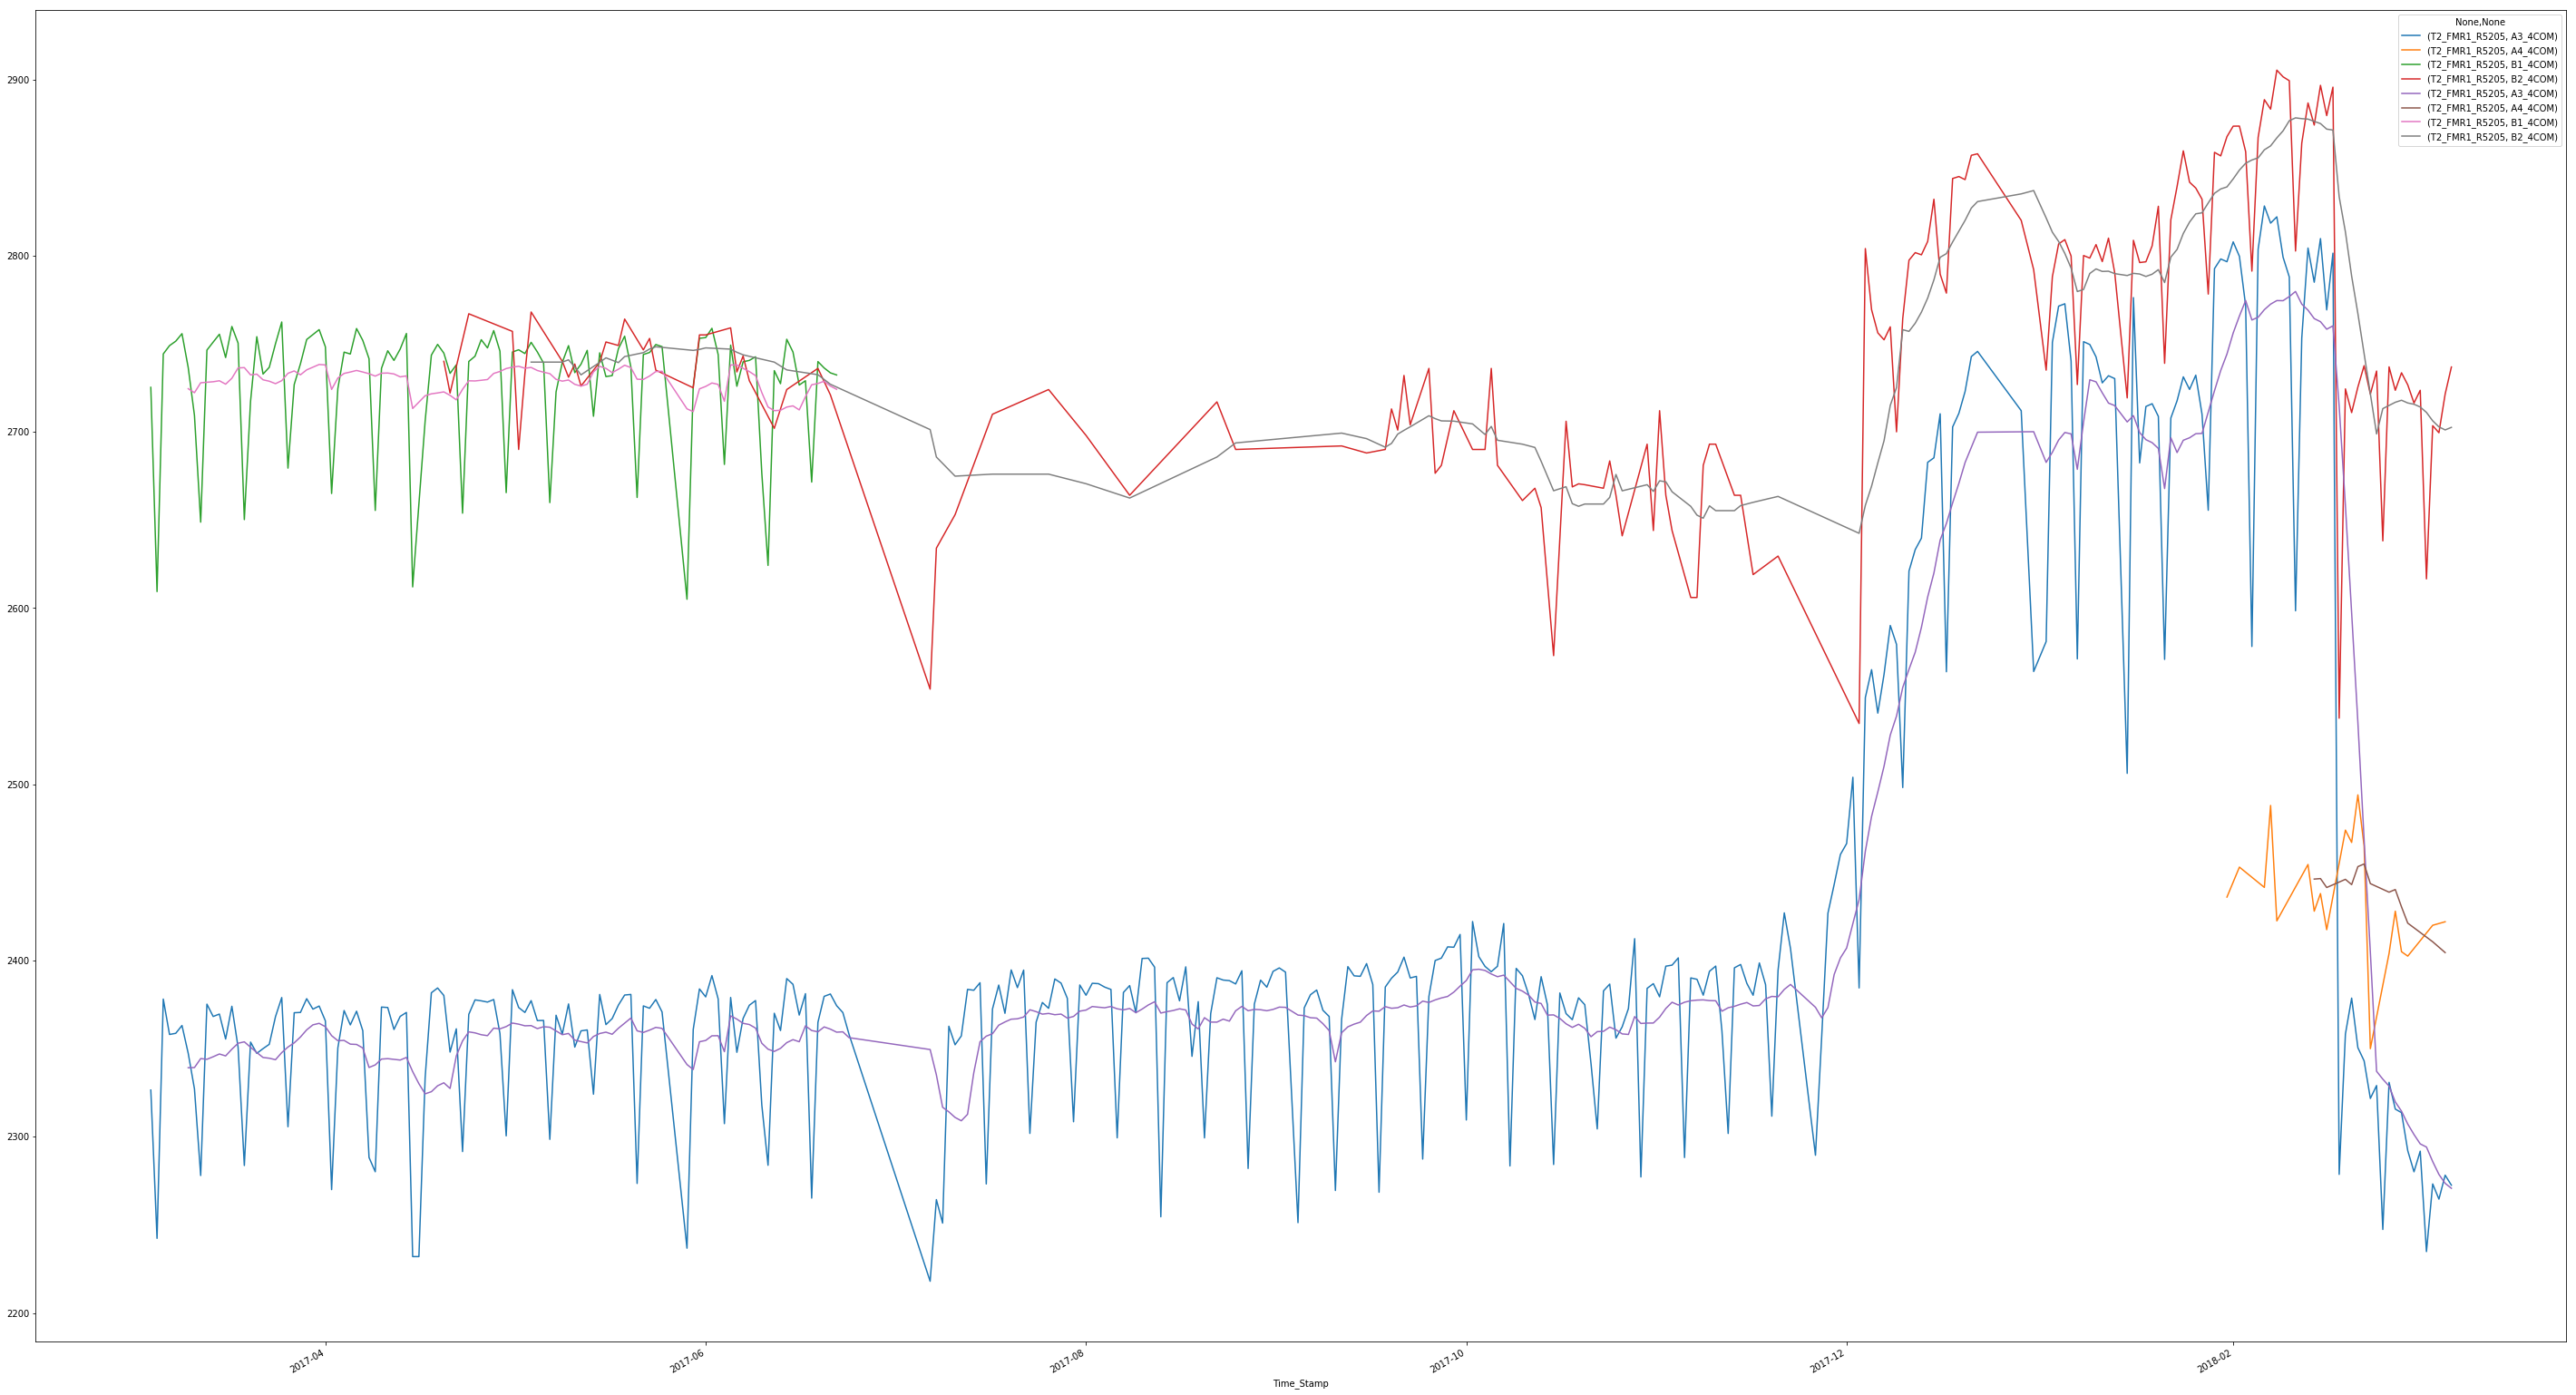

In [52]:
lineplotAV(df_Mav,'G1J3RMS')

In [56]:
rbt_name='T2_FMR1_R5452'
df_hourly,df_daily,df_Mav=alert(dataset,rbt_name)

('Robot Name: ', 'T2_FMR1_R5452')
('Robot Arm Axis: ', u'G1J1RMS')
('Programe Line: ', 'A3_4COM')
Alert Notification Date: 
2017-08-07 00:00:00
2017-08-08 00:00:00
2017-08-09 00:00:00
2017-08-10 00:00:00
2017-08-11 00:00:00
2017-08-12 00:00:00
2017-08-13 00:00:00
2017-08-14 00:00:00
2017-08-15 00:00:00
###########################################
('Robot Name: ', 'T2_FMR1_R5452')
('Robot Arm Axis: ', u'G1J1RMS')
('Programe Line: ', 'B2_4COM')
Alert Notification Date: 
###########################################
('Robot Name: ', 'T2_FMR1_R5452')
('Robot Arm Axis: ', u'G1J1RMS')
('Programe Line: ', 'B1_4COM')
Alert Notification Date: 
###########################################
('Robot Name: ', 'T2_FMR1_R5452')
('Robot Arm Axis: ', u'G1J1RMS')
('Programe Line: ', 'A4_4COM')
Alert Notification Date: 
###########################################
('Robot Name: ', 'T2_FMR1_R5452')
('Robot Arm Axis: ', u'G1J2RMS')
('Programe Line: ', 'A3_4COM')
Alert Notification Date: 
2017-08-07 00:00:00
2017

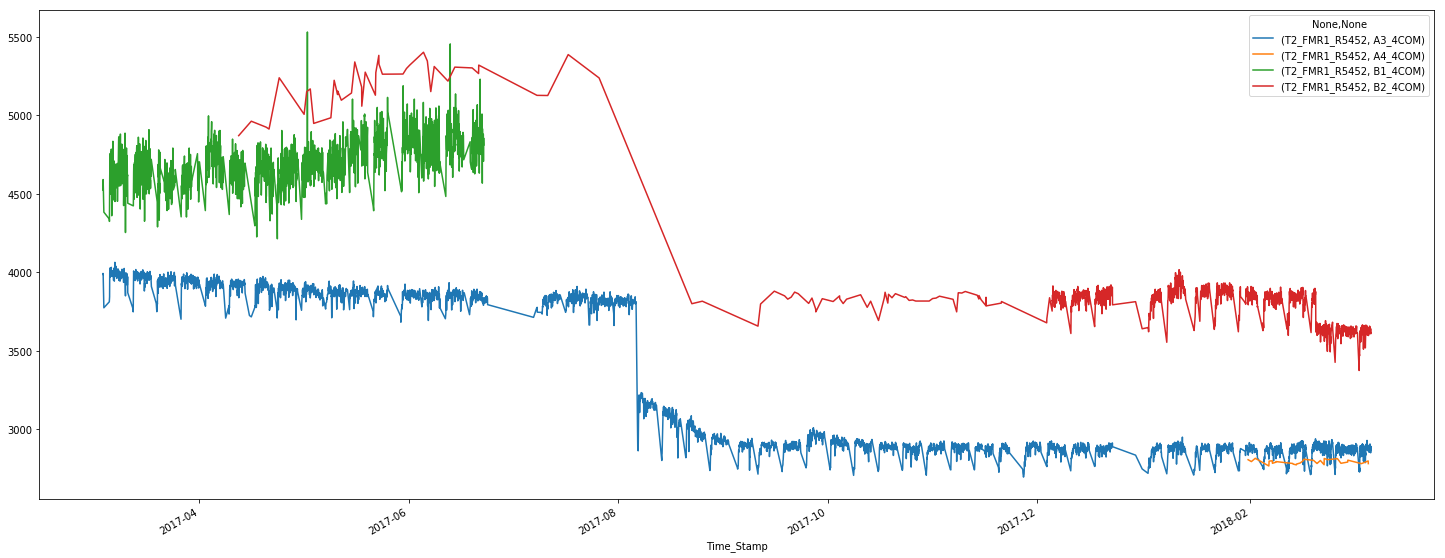

In [57]:
lineplot(df_hourly,'G1J3RMS')

In [58]:
rbt_name='T2_FMR2_R5555'
df_hourly,df_daily,df_Mav=alert(dataset,rbt_name)

('Robot Name: ', 'T2_FMR2_R5555')
('Robot Arm Axis: ', u'G1J1RMS')
('Programe Line: ', 'A3_4COM')
Alert Notification Date: 
###########################################
('Robot Name: ', 'T2_FMR2_R5555')
('Robot Arm Axis: ', u'G1J1RMS')
('Programe Line: ', 'B2_4COM')
Alert Notification Date: 
2017-09-11 00:00:00
2017-09-15 00:00:00
2017-09-18 00:00:00
2017-09-19 00:00:00
2017-09-20 00:00:00
2017-09-21 00:00:00
###########################################
('Robot Name: ', 'T2_FMR2_R5555')
('Robot Arm Axis: ', u'G1J1RMS')
('Programe Line: ', 'B1_4COM')
Alert Notification Date: 
###########################################
('Robot Name: ', 'T2_FMR2_R5555')
('Robot Arm Axis: ', u'G1J1RMS')
('Programe Line: ', 'A4_4COM')
Alert Notification Date: 
###########################################
('Robot Name: ', 'T2_FMR2_R5555')
('Robot Arm Axis: ', u'G1J2RMS')
('Programe Line: ', 'A3_4COM')
Alert Notification Date: 
###########################################
('Robot Name: ', 'T2_FMR2_R5555')
('Robo

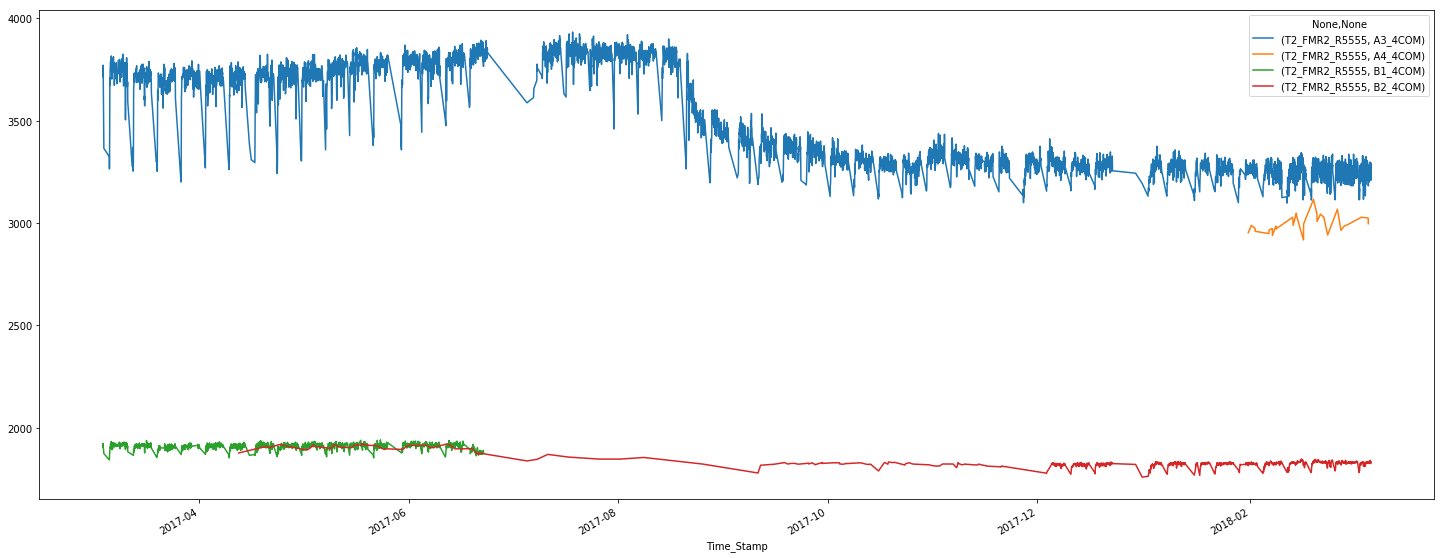

In [59]:
lineplot(df_hourly,'G1J3RMS')

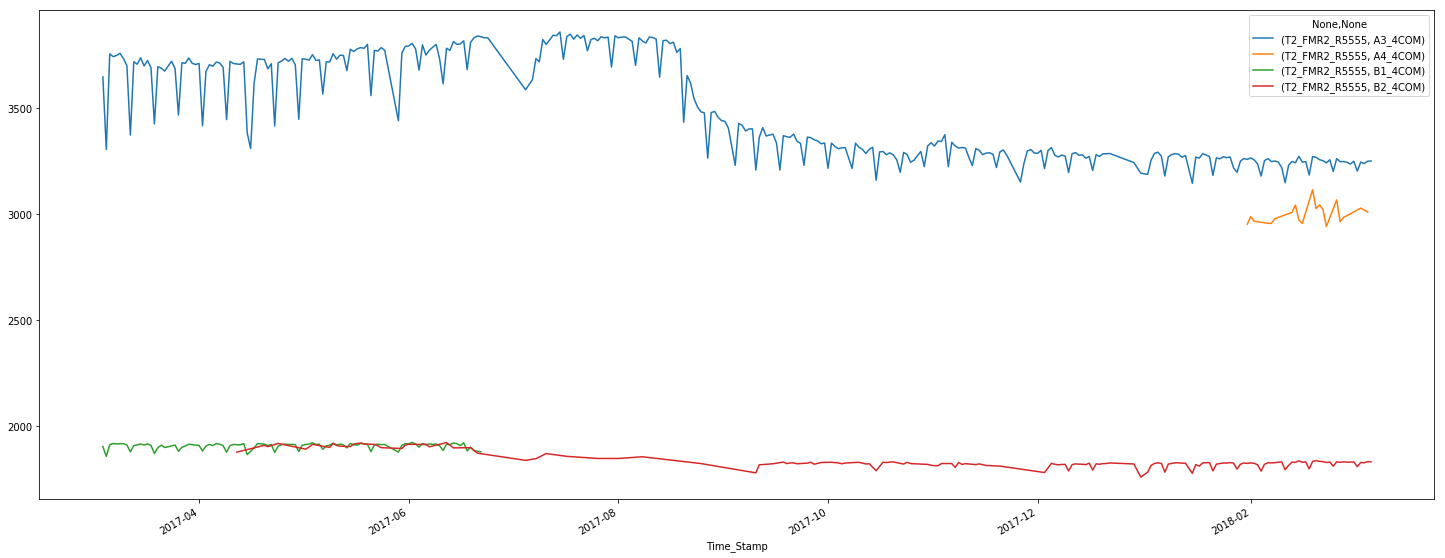

In [60]:
lineplot(df_daily,'G1J3RMS')

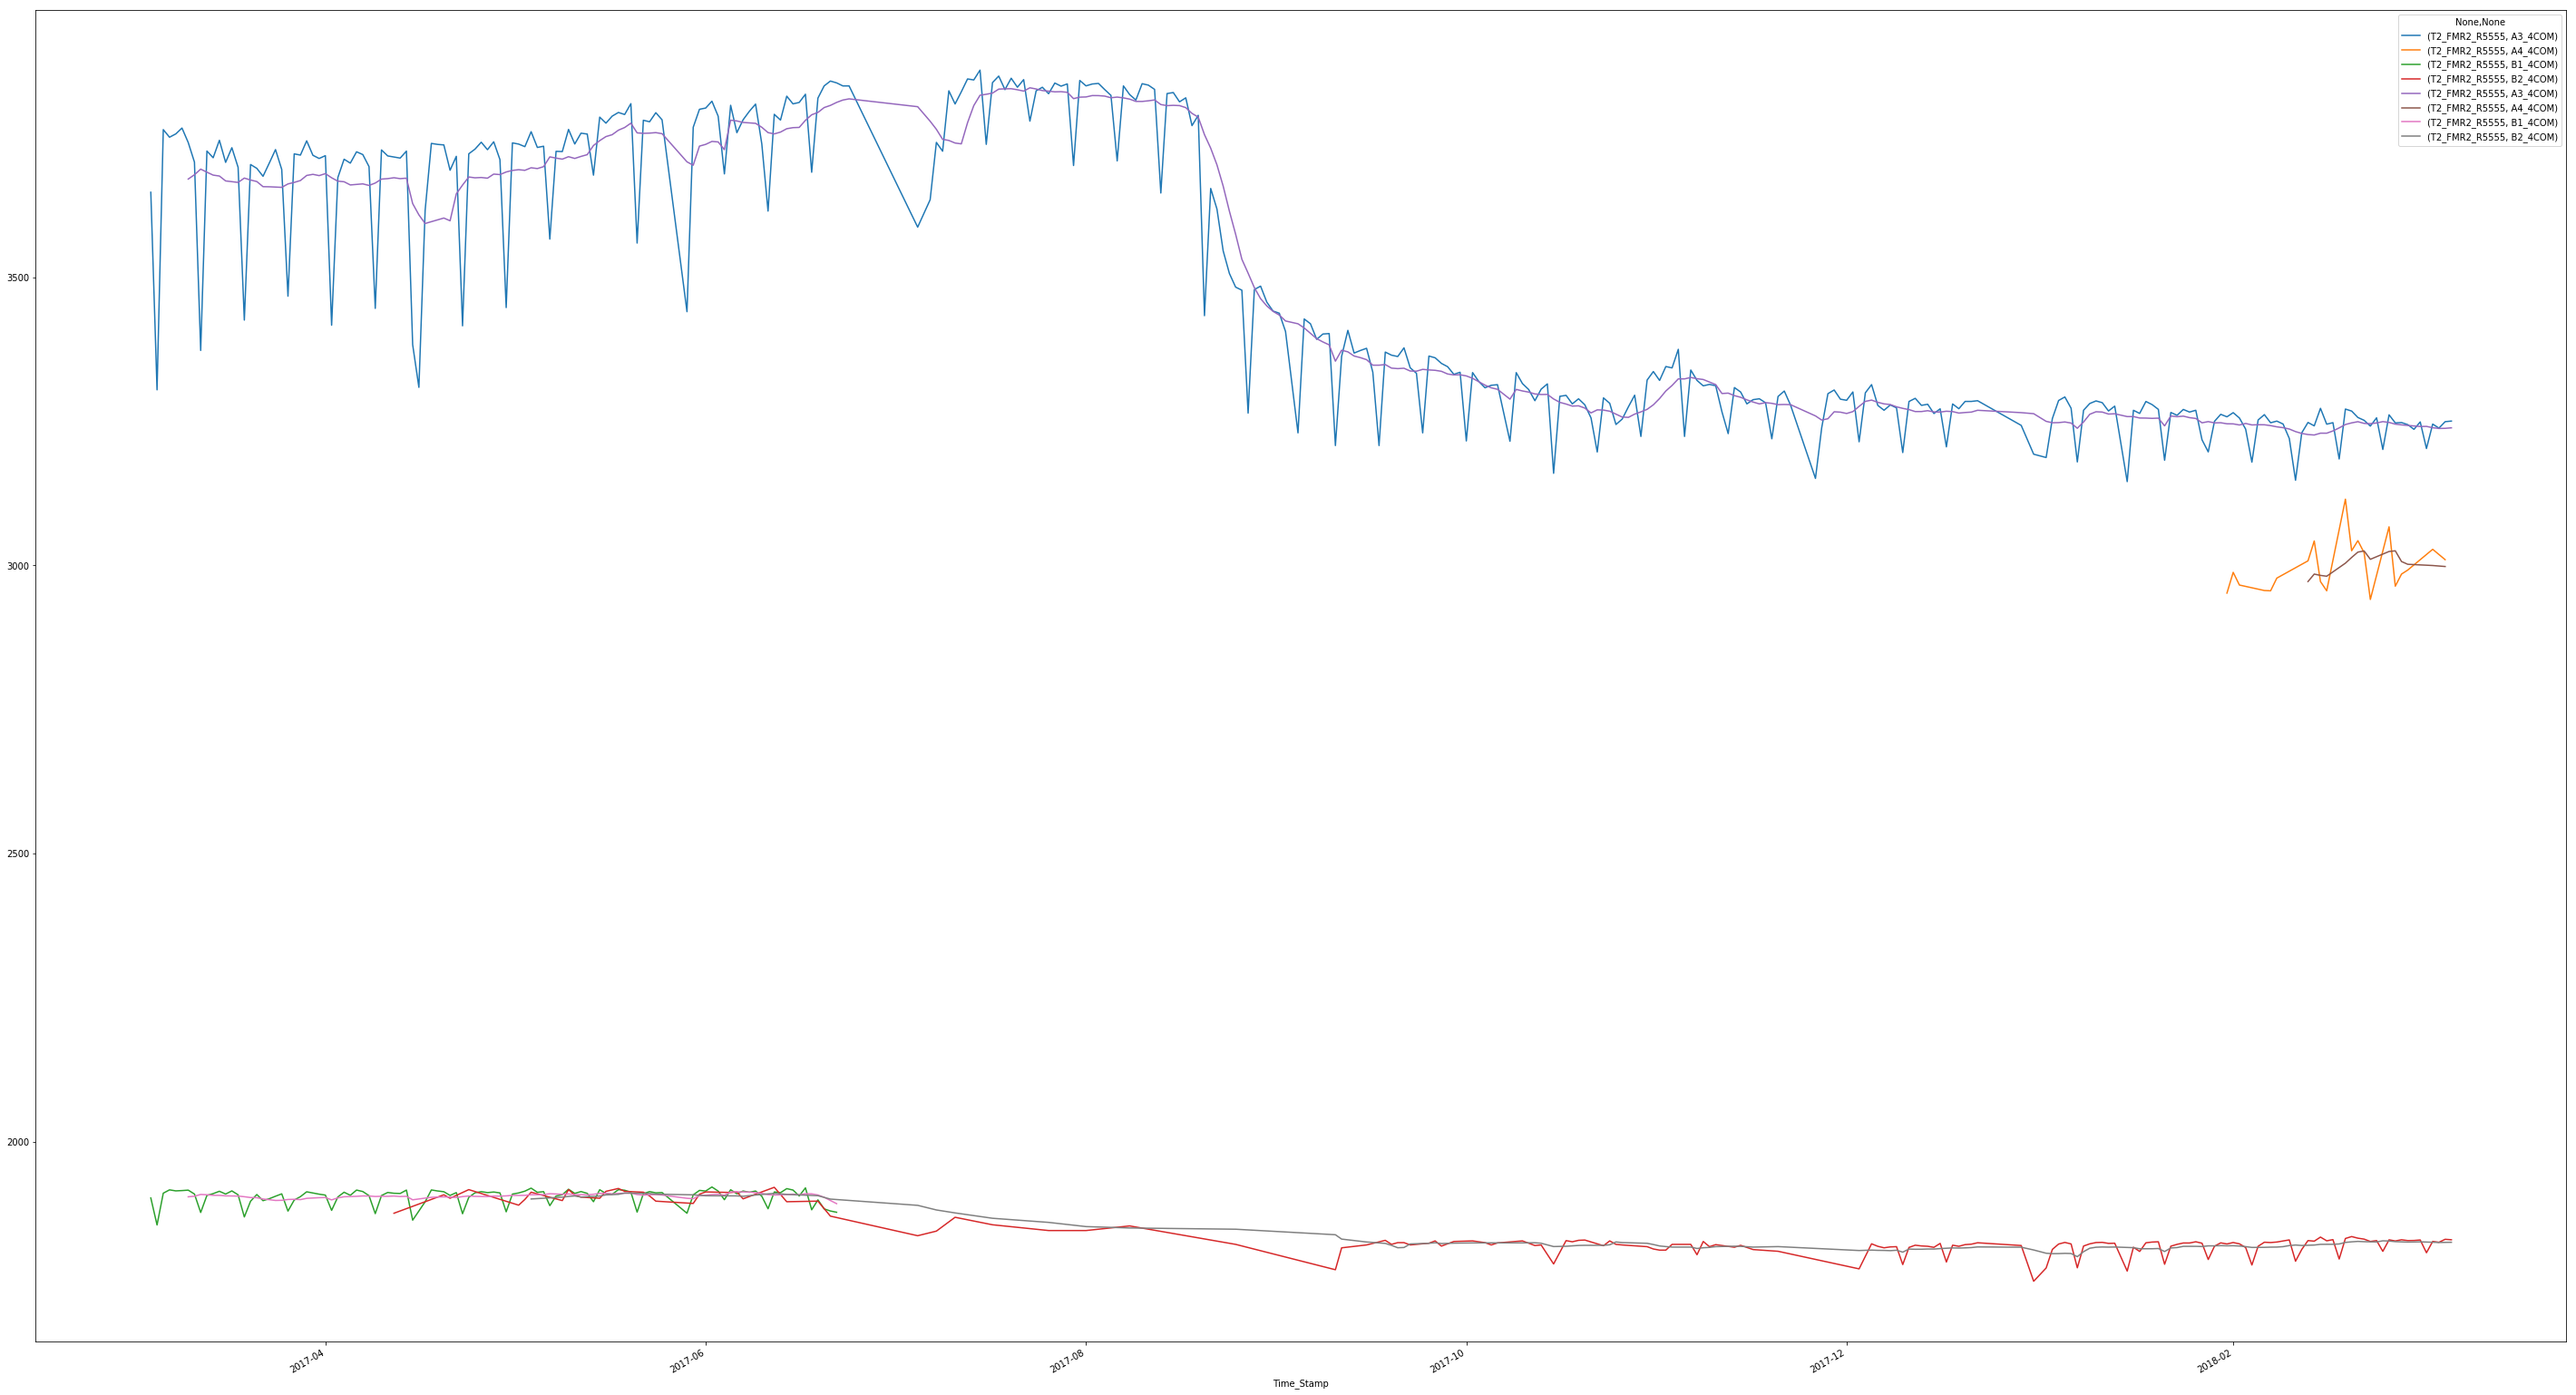

In [61]:
lineplotAV(df_Mav,'G1J3RMS')

In [62]:
rbt_name='T2_FMR2_R5556'
df_hourly,df_daily,df_Mav=alert(dataset,rbt_name)

('Robot Name: ', 'T2_FMR2_R5556')
('Robot Arm Axis: ', u'G1J1RMS')
('Programe Line: ', 'A3_4COM')
Alert Notification Date: 
2017-10-01 00:00:00
2017-10-02 00:00:00
2017-10-03 00:00:00
2017-10-04 00:00:00
2017-10-05 00:00:00
2017-10-06 00:00:00
2017-10-08 00:00:00
2017-10-09 00:00:00
2017-10-10 00:00:00
2017-10-11 00:00:00
###########################################
('Robot Name: ', 'T2_FMR2_R5556')
('Robot Arm Axis: ', u'G1J1RMS')
('Programe Line: ', 'B2_4COM')
Alert Notification Date: 
###########################################
('Robot Name: ', 'T2_FMR2_R5556')
('Robot Arm Axis: ', u'G1J1RMS')
('Programe Line: ', 'B1_4COM')
Alert Notification Date: 
###########################################
('Robot Name: ', 'T2_FMR2_R5556')
('Robot Arm Axis: ', u'G1J1RMS')
('Programe Line: ', 'A4_4COM')
Alert Notification Date: 
###########################################
('Robot Name: ', 'T2_FMR2_R5556')
('Robot Arm Axis: ', u'G1J2RMS')
('Programe Line: ', 'A3_4COM')
Alert Notification Date: 
2017

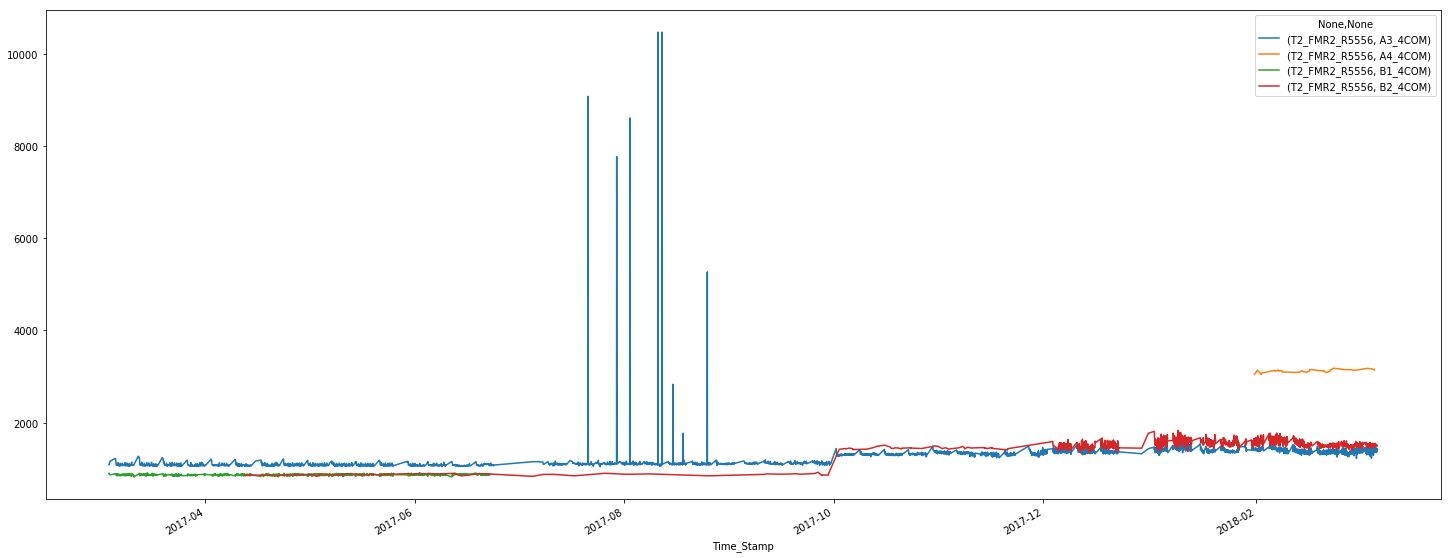

In [63]:
lineplot(df_hourly,'G1J4RMS')